# Week 6: Merging and comparing geospatial data
The **objective** of this lecture is to continue to put in the reptitions of downloading, visualizing, and analyzing geospatial data.  We are working with _two_ different datasets on asset-level emissions.  This lecture is purely the notes, meant exclusively for copy and paste in class, as needed.

In [ ]:
import geopandas
import pandas
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = "https://raw.githubusercontent.com/danhammer/envirods/main/data/steel.geojson"
steel_gdf = geopandas.read_file(url)

In [40]:
steel_gdf.sort_values("CO2_emissions", ascending=False)

,start_date,end_date,asset_name,iso3_country,CO2_emissions,geometry
10338,2016-01-01,2016-01-31,"Jiangsu Shagang Group Co., Ltd.",CHN,4184866.0,POINT (120.63899 31.98315)
1878,2015-03-01,2015-03-31,"Jiangsu Shagang Group Co., Ltd.",CHN,4172448.0,POINT (120.63899 31.98315)
2724,2015-04-01,2015-04-30,"Jiangsu Shagang Group Co., Ltd.",CHN,4172448.0,POINT (120.63899 31.98315)
5262,2015-07-01,2015-07-31,"Jiangsu Shagang Group Co., Ltd.",CHN,4172448.0,POINT (120.63899 31.98315)
186,2015-01-01,2015-01-31,"Jiangsu Shagang Group Co., Ltd.",CHN,4172448.0,POINT (120.63899 31.98315)
...,...,...,...,...,...,...
14538,2016-06-01,2016-06-30,"Henan Fengbao Special Steel Co., Ltd.",CHN,0.0,POINT (113.87216 36.13167)
14531,2016-06-01,2016-06-30,"Jianlong Beiman Special Steel Co., Ltd.",CHN,0.0,POINT (123.61651 47.19129)
14520,2016-06-01,2016-06-30,"Tangshan Wenfeng Special Steel Co., Ltd.",CHN,0.0,POINT (118.43226 39.14654)
56911,2020-08-01,2020-08-31,"Anshan Baode Iron & Steel Co., Ltd.",CHN,0.0,POINT (122.94550 41.17361)


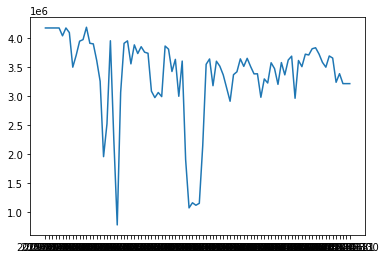

In [41]:
import matplotlib.pyplot as plt
from datetime import datetime

plant = steel_gdf[steel_gdf["asset_name"] == "Jiangsu Shagang Group Co., Ltd."]
plt.plot(
    plant["end_date"], 
    plant["CO2_emissions"],
)

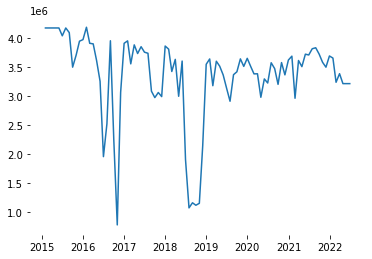

In [42]:
from dateutil.parser import parse
from datetime import datetime

plant['date'] = pandas.to_datetime(plant['end_date'])

plt.plot(
    plant["date"], 
    plant["CO2_emissions"],
)

plt.box(on=None)

In [43]:
plant["year"] = plant["date"].dt.year
print(plant["date"].dt)

In [44]:
steel_gdf["date"] = pandas.to_datetime(steel_gdf['end_date'])
steel_gdf["year"] = steel_gdf["date"].dt.year
steel_gdf

,start_date,end_date,asset_name,iso3_country,CO2_emissions,geometry,date,year
0,2015-01-01,2015-01-31,GHC Emirates Steel Industries Abu Dhabi plant,ARE,62492.0,POINT (54.46799 24.32203),2015-01-31,2015
1,2015-01-01,2015-01-31,Kurum International Elbasan steel plant,ALB,21088.0,POINT (20.02612 41.09461),2015-01-31,2015
2,2015-01-01,2015-01-31,ArcelorMittal Acindar Villa Constitución steel...,ARG,28164.0,POINT (-60.30042 -33.24994),2015-01-31,2015
3,2015-01-01,2015-01-31,TenarisSiderca Campana steel plant,ARG,21537.0,POINT (-58.97739 -34.15255),2015-01-31,2015
4,2015-01-01,2015-01-31,Ternium Siderar San Nicolás steel plant,ARG,317156.0,POINT (-60.13870 -33.37365),2015-01-31,2015
...,...,...,...,...,...,...,...,...
76135,2022-06-01,2022-06-30,Thai Nguyen Iron & Steel plant,VNM,32004.0,POINT (105.87280 21.55748),2022-06-30,2022
76136,2022-06-01,2022-06-30,ArcelorMittal Newcastle Steel Works,ZAF,102942.0,POINT (30.01406 -27.70538),2022-06-30,2022
76137,2022-06-01,2022-06-30,ArcelorMittal Vanderbijlpark Steel Works,ZAF,83334.0,POINT (27.82231 -26.65737),2022-06-30,2022
76138,2022-06-01,2022-06-30,Acerinox Columbus Stainless steel plant,ZAF,13599.0,POINT (29.49797 -25.79631),2022-06-30,2022


In [45]:
steel_collapsed = steel_gdf.groupby(["asset_name"])["CO2_emissions"].sum().reset_index()

In [46]:
locations = steel_gdf[["asset_name", "geometry"]].drop_duplicates(ignore_index=True)

(-198.0, 198.00000000000006, -62.574678000000006, 90.60797800000003)

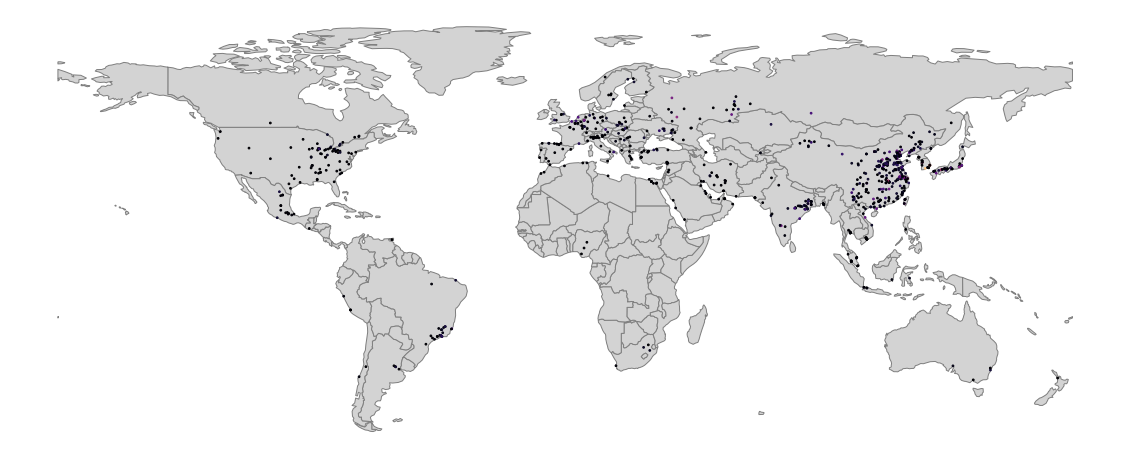

In [47]:
df = steel_collapsed.merge(locations, on="asset_name")
gdf = geopandas.GeoDataFrame(df, geometry="geometry")

import matplotlib.pyplot as plt

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world["continent"] != "Antarctica"]

fig, ax = plt.subplots(figsize=(20, 10))

world.plot(
    ax=ax,
    edgecolor="grey",
    color="lightgrey"
)

gdf.plot(
    ax=ax,
    markersize=3,
    column="CO2_emissions",
    cmap="magma"
)

plt.box(on=None)
plt.axis('off')

In [48]:
import numpy

gdf["log_CO2_emissions"] = numpy.log(gdf["CO2_emissions"])
gdf.sort_values("CO2_emissions")

print(gdf[["asset_name", "CO2_emissions"]].sort_values("CO2_emissions").head())

                                   asset_name  CO2_emissions
24            Al Tuwairqi Steel Karachi plant            0.0
64         ArcelorMittal Florange steel plant            0.0
474  Max Aicher Slovakia Steel Mills Strazske            0.0
366            JSW Bengal Steel Salboni plant            0.0
535                  Nursan Steel Payas plant            0.0


(-198.0, 198.00000000000006, -62.574678000000006, 90.60797800000003)

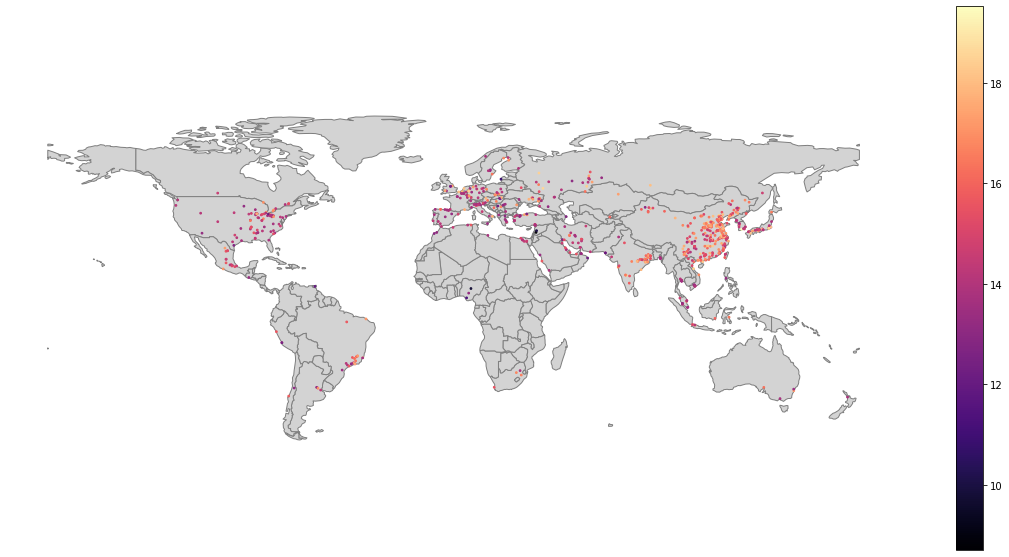

In [49]:
gdf = gdf[gdf["CO2_emissions"] > 0]
gdf["log_CO2_emissions"] = numpy.log(gdf["CO2_emissions"])

fig, ax = plt.subplots(figsize=(20, 10))

world.plot(
    ax=ax,
    edgecolor="grey",
    color="lightgrey"
)

gdf.plot(
    ax=ax,
    markersize=3,
    column="log_CO2_emissions",
    cmap="magma",
    legend=True
)

plt.box(on=None)
plt.axis('off')

In [50]:
aviation = pandas.read_csv("https://raw.githubusercontent.com/danhammer/envirods/main/data/aviation.csv")
aviation['geometry'] = geopandas.GeoSeries.from_wkt(aviation['geometry'])

aviation_gdf = geopandas.GeoDataFrame(
    aviation,
    geometry="geometry"
)

In [51]:
x = aviation_gdf.groupby(["iso3_country"]).sum()["CO2_emissions_tonnes"].reset_index()
x.columns = ["iso", "aviation_emissions"]

y = steel_gdf.groupby(["iso3_country"]).sum()["CO2_emissions"].reset_index()
y.columns = ["iso", "steel_emissions"]

<BarContainer object of 10 artists>

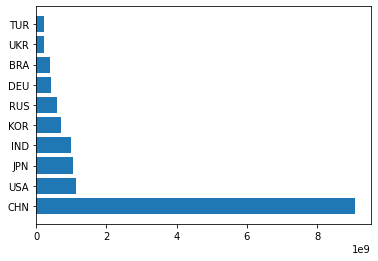

In [52]:
df = x.merge(y, how="inner", on="iso")
df["total"] =  df["aviation_emissions"] + df["steel_emissions"]

graphing_df = df.sort_values("total", ascending=False)[0:10]

plt.barh(
    graphing_df["iso"],
    graphing_df["total"]
)

<BarContainer object of 10 artists>

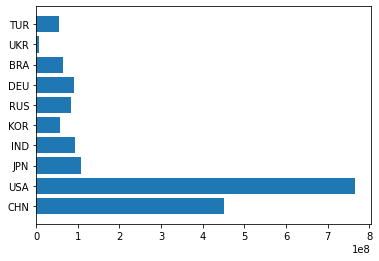

In [53]:
plt.barh(graphing_df["iso"], graphing_df["aviation_emissions"])

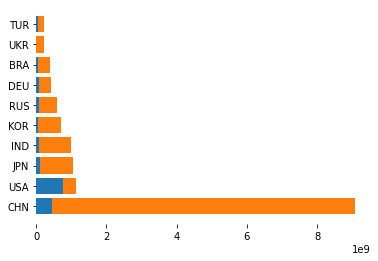

In [58]:
plt.barh(graphing_df["iso"], graphing_df["aviation_emissions"])
plt.barh(graphing_df["iso"], graphing_df["steel_emissions"], left=graphing_df["aviation_emissions"])
plt.box(on=None)
plt.savefig("/Users/danhammer/Desktop/steel.png", transparent=True)

<BarContainer object of 10 artists>

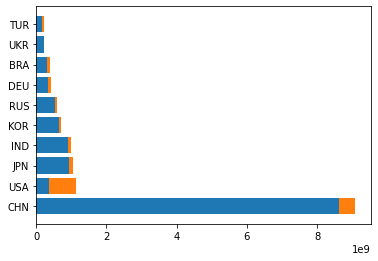

In [55]:
plt.barh(graphing_df["iso"], graphing_df["steel_emissions"])
plt.barh(graphing_df["iso"], graphing_df["aviation_emissions"], left=graphing_df["steel_emissions"])

In [63]:
aviation_gdf["date"] = pandas.to_datetime(aviation_gdf['end_date'])
aviation_gdf["year"] = aviation_gdf["date"].dt.year

In [66]:
x = aviation_gdf.groupby(["year"]).sum()["CO2_emissions_tonnes"].reset_index()
x.columns = ["year", "aviation_emissions"]

y = steel_gdf.groupby(["year"]).sum()["CO2_emissions"].reset_index()
y.columns = ["year", "steel_emissions"]

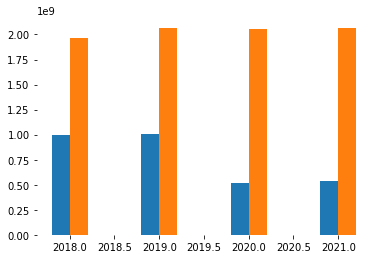

In [83]:
df = x.merge(y, how="inner", on="year")
df["total"] =  df["aviation_emissions"] + df["steel_emissions"]

df = df[df.year < 2022] # different months

# plot bars
plt.bar(df["year"] - 0.1, df['aviation_emissions'], width = 0.2)
plt.bar(df["year"] + 0.1, df['steel_emissions'], width = 0.2)

plt.box(on=None)
plt.savefig("/Users/danhammer/Desktop/annual.png", transparent=True)

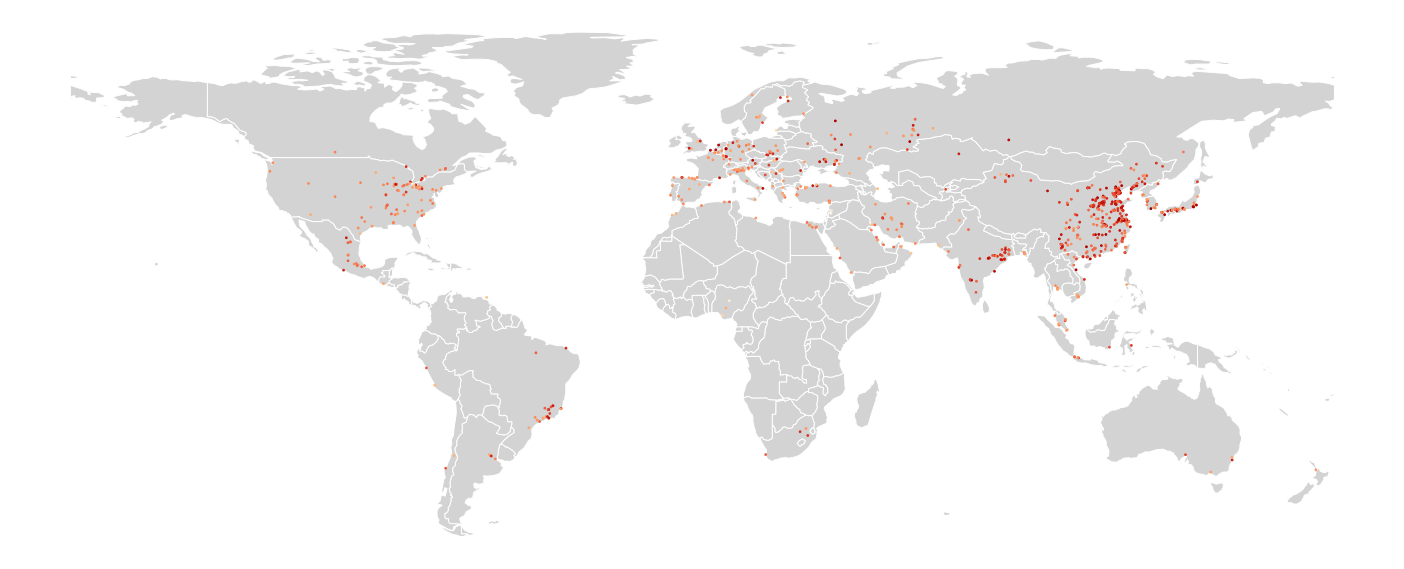

In [92]:
df = steel_collapsed.merge(locations, on="asset_name")
gdf = geopandas.GeoDataFrame(df, geometry="geometry")


gdf = gdf[gdf["CO2_emissions"] > 0]
gdf["log_CO2_emissions"] = numpy.log(gdf["CO2_emissions"])

fig, ax = plt.subplots(figsize=(20, 10), frameon=False)

world.plot(
    ax=ax,
    edgecolor="white",
    color="lightgrey"
)

gdf.plot(
    ax=ax,
    markersize=3,
    column="log_CO2_emissions",
    cmap="OrRd"
)

plt.tight_layout()
plt.box(on=None)
plt.axis('off')
plt.savefig("/Users/danhammer/Desktop/steel.png", transparent=True)


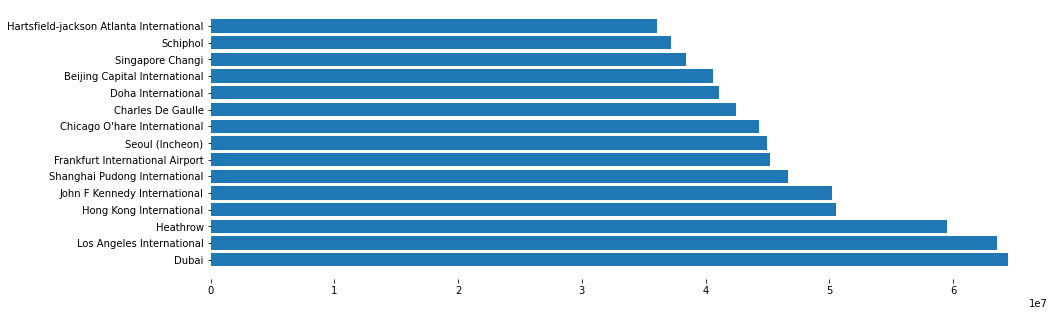

In [107]:
x = aviation_gdf.groupby("asset_name").sum()["CO2_emissions_tonnes"].reset_index()

x = x.sort_values("CO2_emissions_tonnes", ascending=False)

fig, ax = plt.subplots(figsize=(15, 5), frameon=False)

plt.barh(
    x["asset_name"],
    x["CO2_emissions_tonnes"]
)

plt.box(on=None)
plt.savefig("/Users/danhammer/Desktop/airports.png", transparent=True)

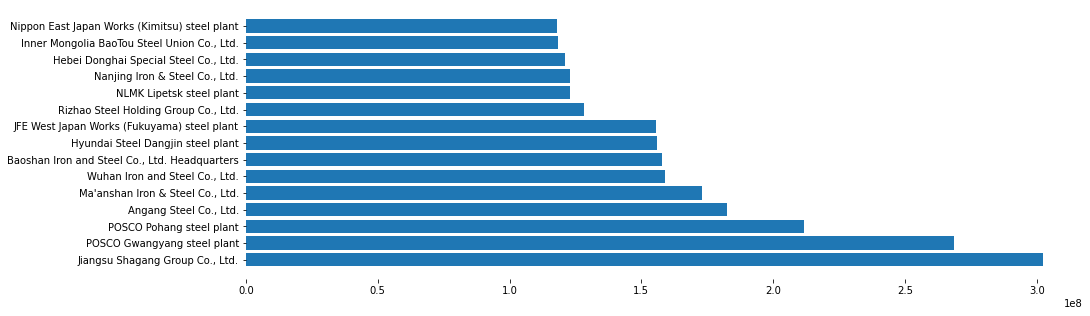

In [114]:
x = steel_gdf.groupby("asset_name").sum()["CO2_emissions"].reset_index()

x = x.sort_values("CO2_emissions", ascending=False)[0:15]

fig, ax = plt.subplots(figsize=(15, 5), frameon=False)

plt.barh(
    x["asset_name"],
    x["CO2_emissions"]
)

plt.box(on=None)
plt.savefig("/Users/danhammer/Desktop/steel_rank.png", transparent=True)

## Comparisons

In [ ]:
url = "https://raw.githubusercontent.com/danhammer/envirods/main/data/steel.geojson"
steel_gdf = geopandas.read_file(url)